In [1]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

No joblib
no cmocean


13 120 -1.3226069444326598
13 120 -1.494738391399161


(1e-07, 0.001)

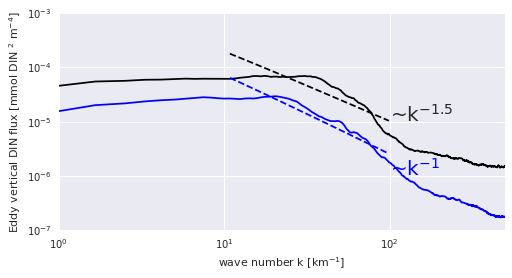

In [31]:
plt.figure(4,figsize=(8,4))
plt.style.use('seaborn')


data = np.load('FFT_EDYH.npz')
fft_fre = data['fft_fre']
xfre = data['xfre']
logfield = data['logfield']
field_ys = data['field_ys']
logfre = data['logfre']
field_spw_mean = data['field_spw_mean']

starti = 13#3
endi    = 120#25 
m_field,c_field = np.polyfit(logfre[starti:endi], logfield[starti:endi], 1)
print starti, endi, m_field
field_ys = 10.**c_field * xfre[1:-1]**m_field

plt.loglog(abs(fft_fre[0:601])*1000,field_spw_mean,'k')
#plt.loglog(xfre[4:33],sst_ys[4:33],'r')
plt.loglog(xfre[starti:endi]*1000,field_ys[starti:endi],'--k')
plt.text(100,10**(-5),r'~k$^{-1.5}$', fontsize=20)


data = np.load('FFT_EDYV.npz')
fft_fre = data['fft_fre']
xfre = data['xfre']
logfield = data['logfield']
field_ys = data['field_ys']
logfre = data['logfre']
field_spw_mean = data['field_spw_mean']

m_field,c_field = np.polyfit(logfre[starti:endi], logfield[starti:endi], 1)
print starti, endi, m_field
field_ys = 10.**c_field * xfre[1:-1]**m_field


plt.figure(4,figsize=(8,4))
plt.style.use('seaborn')

plt.loglog(abs(fft_fre[0:601])*1000,field_spw_mean,'b')
#plt.loglog(xfre[4:33],sst_ys[4:33],'r')
plt.loglog(xfre[starti:endi]*1000,field_ys[starti:endi],'--b')
plt.text(100,10**(-6),r'~k$^{-1}$', fontsize=20, color='b')
plt.ylabel(r'Eddy vertical DIN flux [mmol DIN $^{2}$ m$^{-4}$]')
plt.xlabel(r'wave number k [km$^{-1}$]')
plt.xlim(1,500)
plt.ylim(10**-7,10**-3)

10 130 -1.289933981384984
10 130 -1.4469094987563114


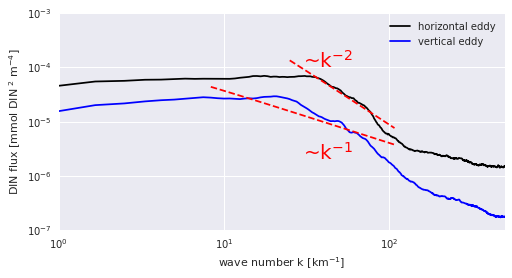

In [69]:
plt.figure(4,figsize=(8,4))
plt.style.use('seaborn')


data = np.load('FFT_EDYH.npz')
fft_fre = data['fft_fre']
xfre = data['xfre']
logfield = data['logfield']
field_ys = data['field_ys']
logfre = data['logfre']
field_spw_mean = data['field_spw_mean']

starti = 10#3
endi    = 130#25 
m_field,c_field = np.polyfit(logfre[starti:endi], logfield[starti:endi], 1)
print starti, endi, m_field
field_ys = 10.**c_field * xfre[1:-1]**m_field

plt.loglog(abs(fft_fre[0:601])*1000,field_spw_mean,'k',label='horizontal eddy')
#plt.loglog(xfre[4:33],sst_ys[4:33],'r')
#plt.loglog(xfre[starti:endi]*1000,field_ys[starti:endi],'--k')



data = np.load('FFT_EDYV.npz')
fft_fre = data['fft_fre']
xfre = data['xfre']
logfield = data['logfield']
field_ys = data['field_ys']
logfre = data['logfre']
field_spw_mean = data['field_spw_mean']

m_field,c_field = np.polyfit(logfre[starti:endi], logfield[starti:endi], 1)
print starti, endi, m_field
field_ys = 10.**c_field * xfre[1:-1]**m_field

field_1 = 10.**c_field+4*10**-7 * xfre[1:-1]**(-1)
field_2 = 10.**c_field * xfre[1:-1]**(-2)

plt.figure(4,figsize=(8,4))
plt.style.use('seaborn')

plt.loglog(abs(fft_fre[0:601])*1000,field_spw_mean,'b',label='vertical eddy')
#plt.loglog(xfre[4:33],sst_ys[4:33],'r')
#plt.loglog(xfre[starti:endi]*1000,field_ys[starti:endi],'--b')

plt.ylabel(r'DIN flux [mmol DIN $^{2}$ m$^{-4}$]')
plt.xlabel(r'wave number k [km$^{-1}$]')
plt.xlim(1,500)
plt.ylim(10**-7,10**-3)


plt.loglog(xfre[starti:endi]*1000,field_1[starti:endi],'--r')
plt.loglog(xfre[starti+20:endi]*1000,field_2[starti+20:endi],'--r')
plt.text(30,2*10**(-6),r'~k$^{-1}$', fontsize=20, color='r')
plt.text(30,10**(-4),r'~k$^{-2}$', fontsize=20, color='r')

plt.legend()

['fft_fre',
 'xfre',
 'logfield',
 'field_ys',
 'starti',
 'c_field',
 'logfre',
 'endi',
 'm_field',
 'field_spw_mean']